<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Current-conclusion" data-toc-modified-id="Current-conclusion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Current conclusion</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#10-Nodes" data-toc-modified-id="10-Nodes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>10 Nodes</a></span></li><li><span><a href="#25-Nodes" data-toc-modified-id="25-Nodes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>25 Nodes</a></span></li><li><span><a href="#100-Nodes" data-toc-modified-id="100-Nodes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>100 Nodes</a></span></li><li><span><a href="#200-Nodes" data-toc-modified-id="200-Nodes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>200 Nodes</a></span></li></ul></div>

We do the same analysis but for all the data used in the quals

Idea: currently we only look at the balance norm as a check at the end of the iteration

- can be used in the iteration as a way to choose best assignment of all in terms of balance (we do not really care about solving the intermediary problem exactly
- can be used as a diagnosis to see if we indeed go in between states of alternating good and bad balances

As guessed, if we make sure that we get "enough iterations" in the inner loops for 10 nodes, we get the appropriate result somewhat quicker. This was achieved by relaxing the update factor to 5 (which is still huge)

Current hypothesis is that we have to find a sweet spot between
- update factor
- number of inner loop iterations
- n_rolling: i.e. how far out we need the stopping criterion to be equal to zero

Because the main problem is that we have some inner iterations that are "solved" in one step and that cannot be!

Actually, maybe the update factor is a bad idea in the end as it prevents you from exploring some directions and therefore puts you in a bad position for following iterations
Maybe good to turn on after a few iterations

One possibility to be less bothered by bumps is simply to raise the FW tol for a bit
- either evolving
- just fixed high

BTW, the 30NO are the datasets used for the second round of experiments (where we try to understand how to get to higher number of iterations)

# Current conclusion

# Load

In [14]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from result_analysis import plot_ri, print_final_flows, plot_cost_all_path, plot_ri_list, plot_balance_list

import pandas as pd

from result_analysis import plot_stop_and_cost

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 10 Nodes

In [125]:
n_nodes=10
subfolder='results'

In [126]:
path='Data/'+str(n_nodes)+'Nodes/outputs/quals/'+subfolder

In [127]:
print(os.listdir(path))

['output_L_100000_ni_5000_no_40_ev_0_relative_progress_fu_True.pkl', 'output_L_10000_ni_5000_no_40_ev_0_relative_progress_fu_True.pkl', 'output_L_10000_ni_1000_no_30_ev_0_relative_progress_fu_True.pkl']


In [128]:
filename=os.listdir(path)[2]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list = pickle.load(f)

output_L_10000_ni_1000_no_30_ev_0_relative_progress_fu_True.pkl


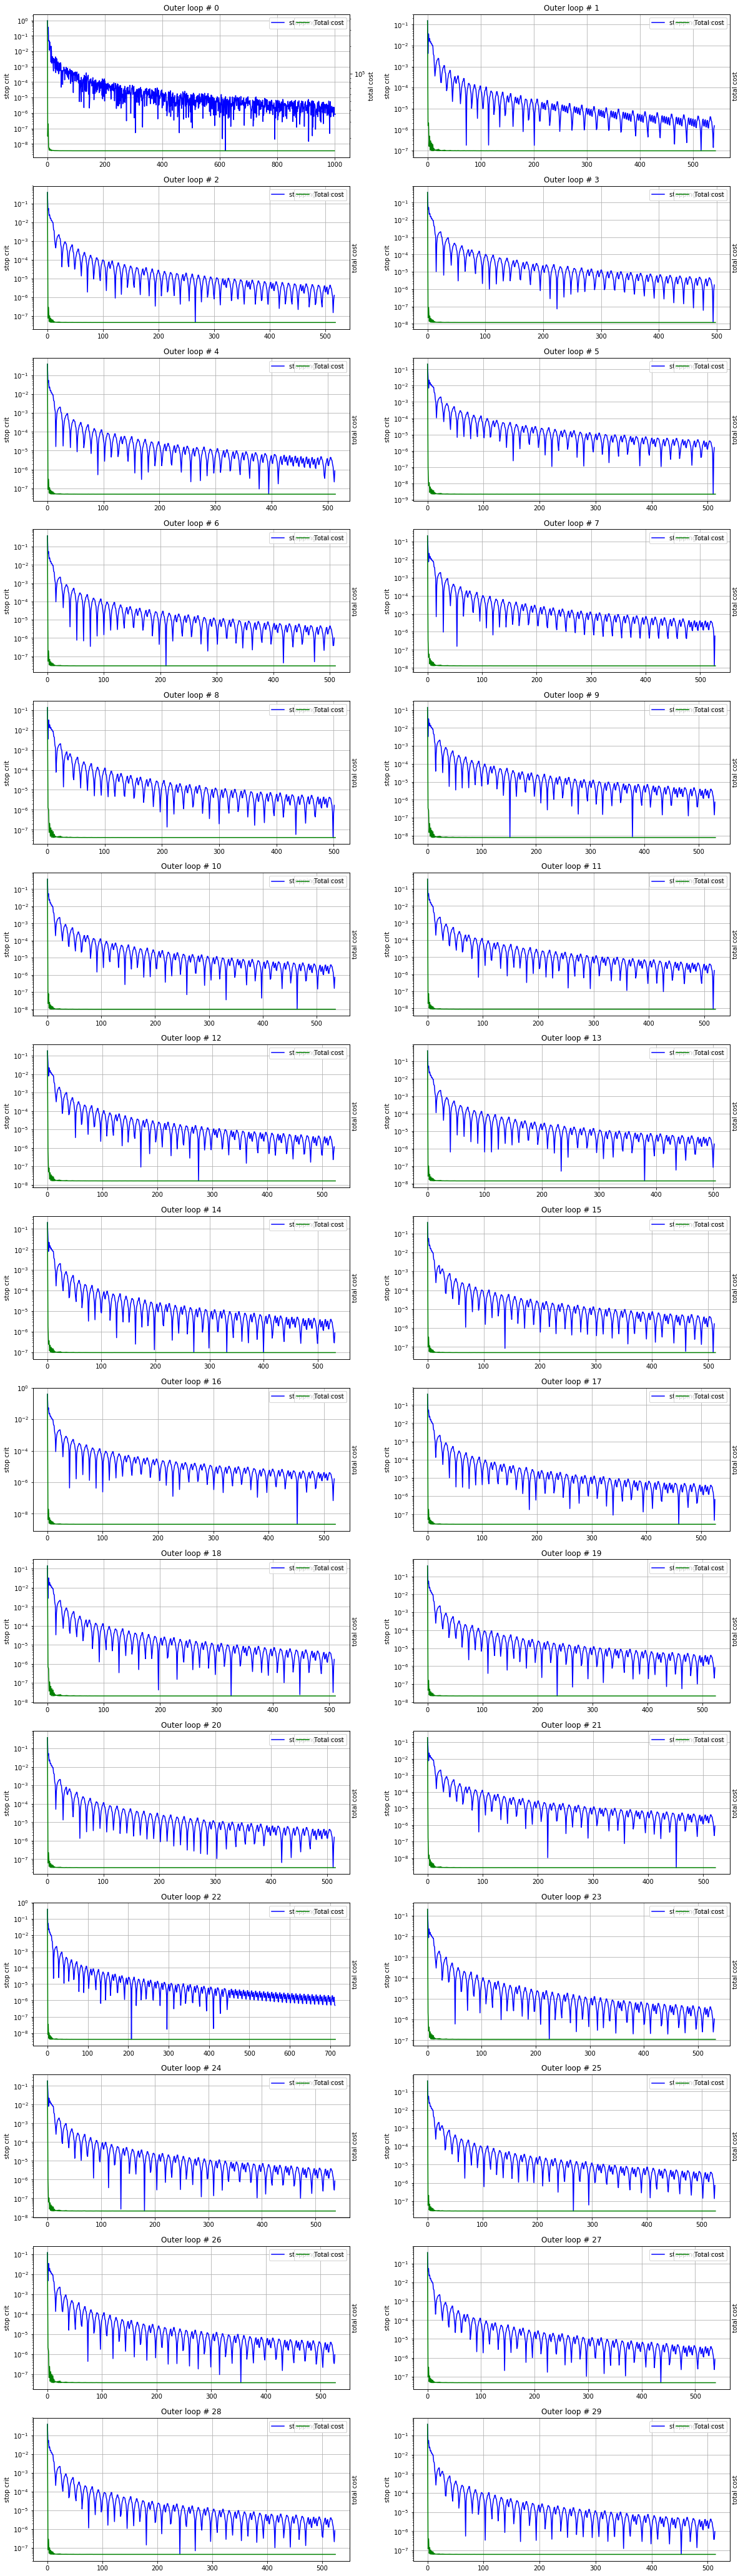

In [131]:
plot_stop_and_cost(opt_res, scale='log')

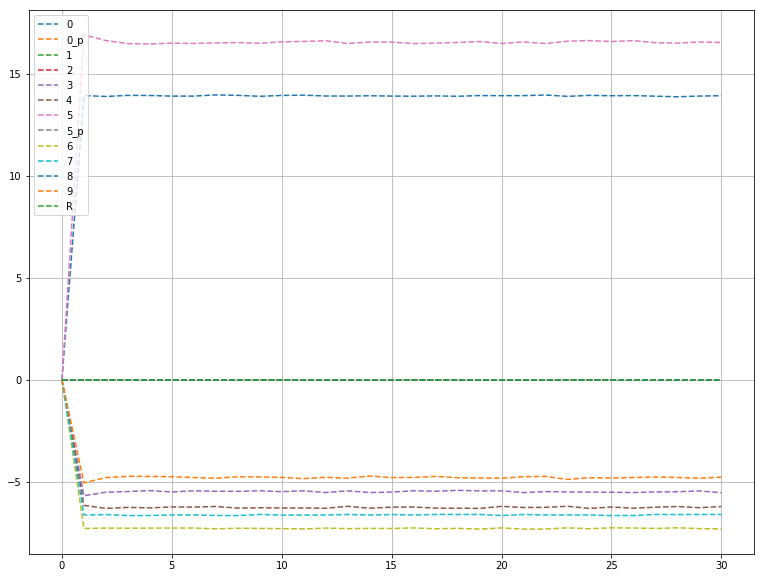

In [130]:
plot_ri_list(ri_FW)

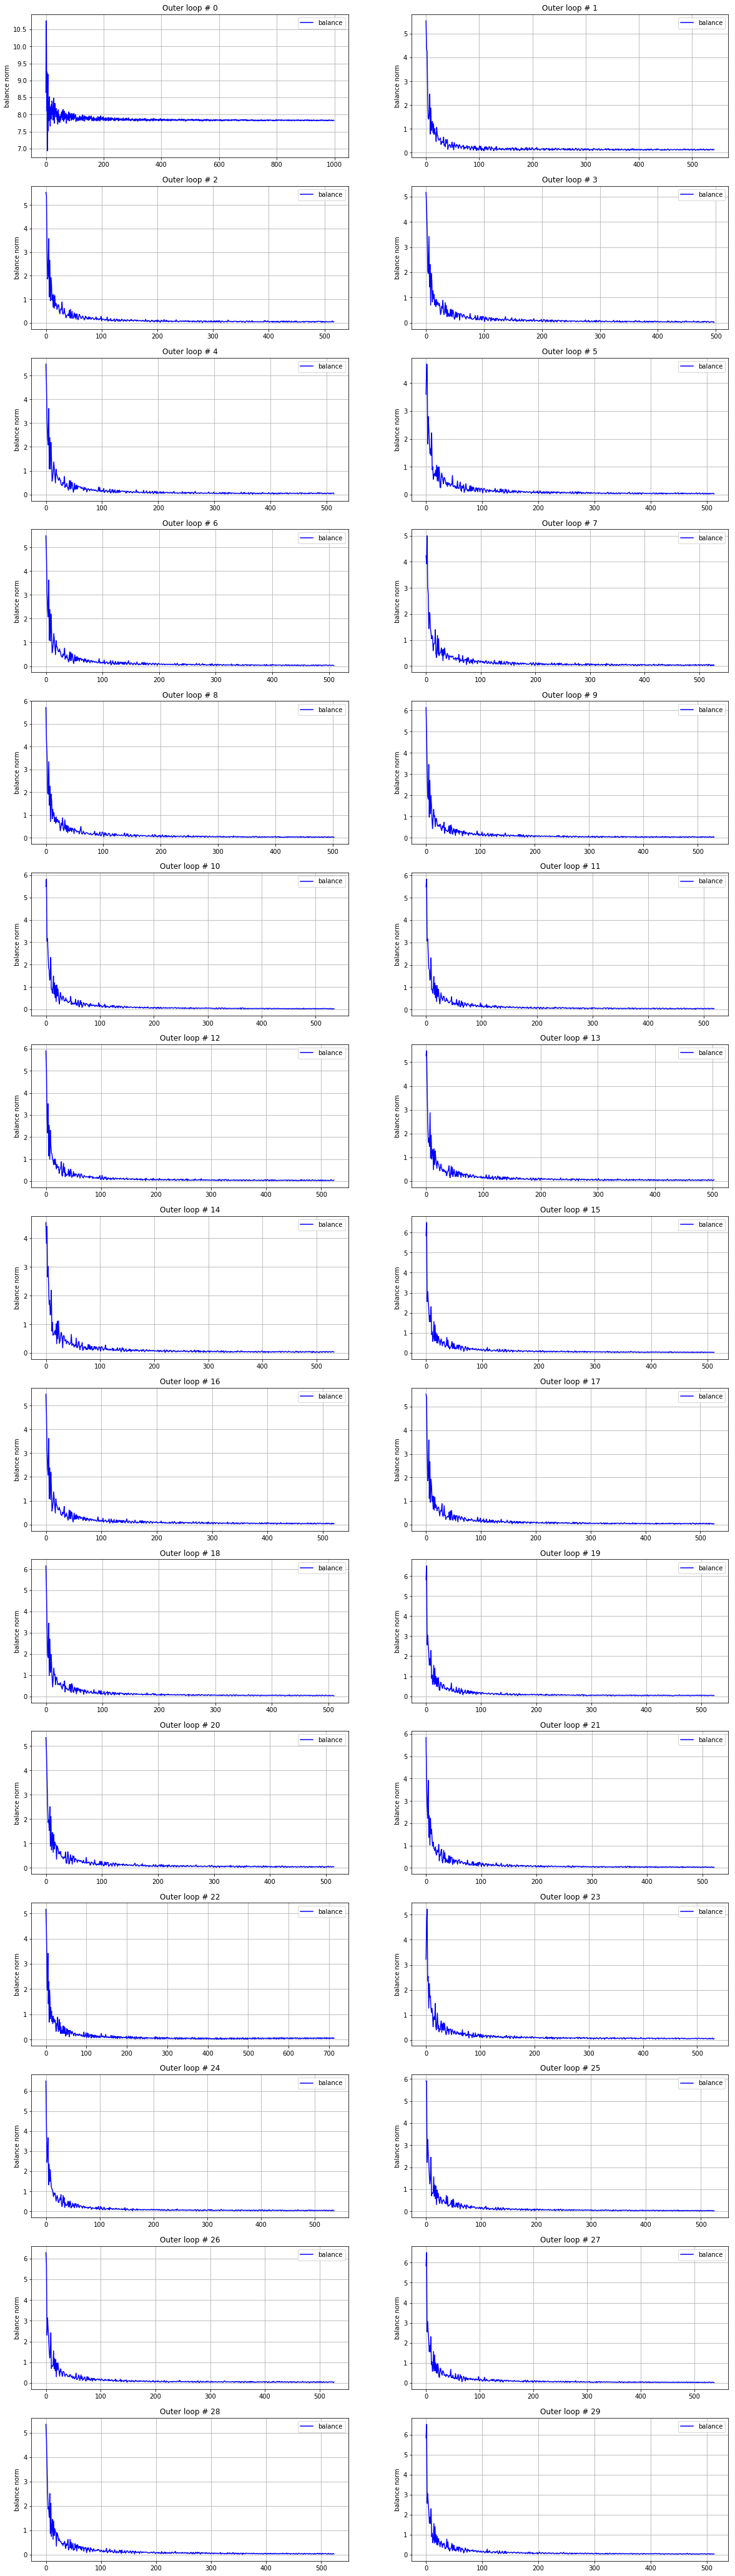

In [132]:
plot_balance_list(balance_list)

# 25 Nodes

In [134]:
n_nodes=25
subfolder='results'

In [135]:
path='Data/'+str(n_nodes)+'Nodes/outputs/quals/'+subfolder

In [136]:
print(os.listdir(path))

['output_L_10000_ni_5000_no_40_ev_0_relative_progress_fu_True.pkl', 'output_L_10000_ni_1000_no_30_ev_0_relative_progress_fu_True.pkl']


In [145]:
filename=os.listdir(path)[1]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list = pickle.load(f)

output_L_10000_ni_1000_no_30_ev_0_relative_progress_fu_True.pkl


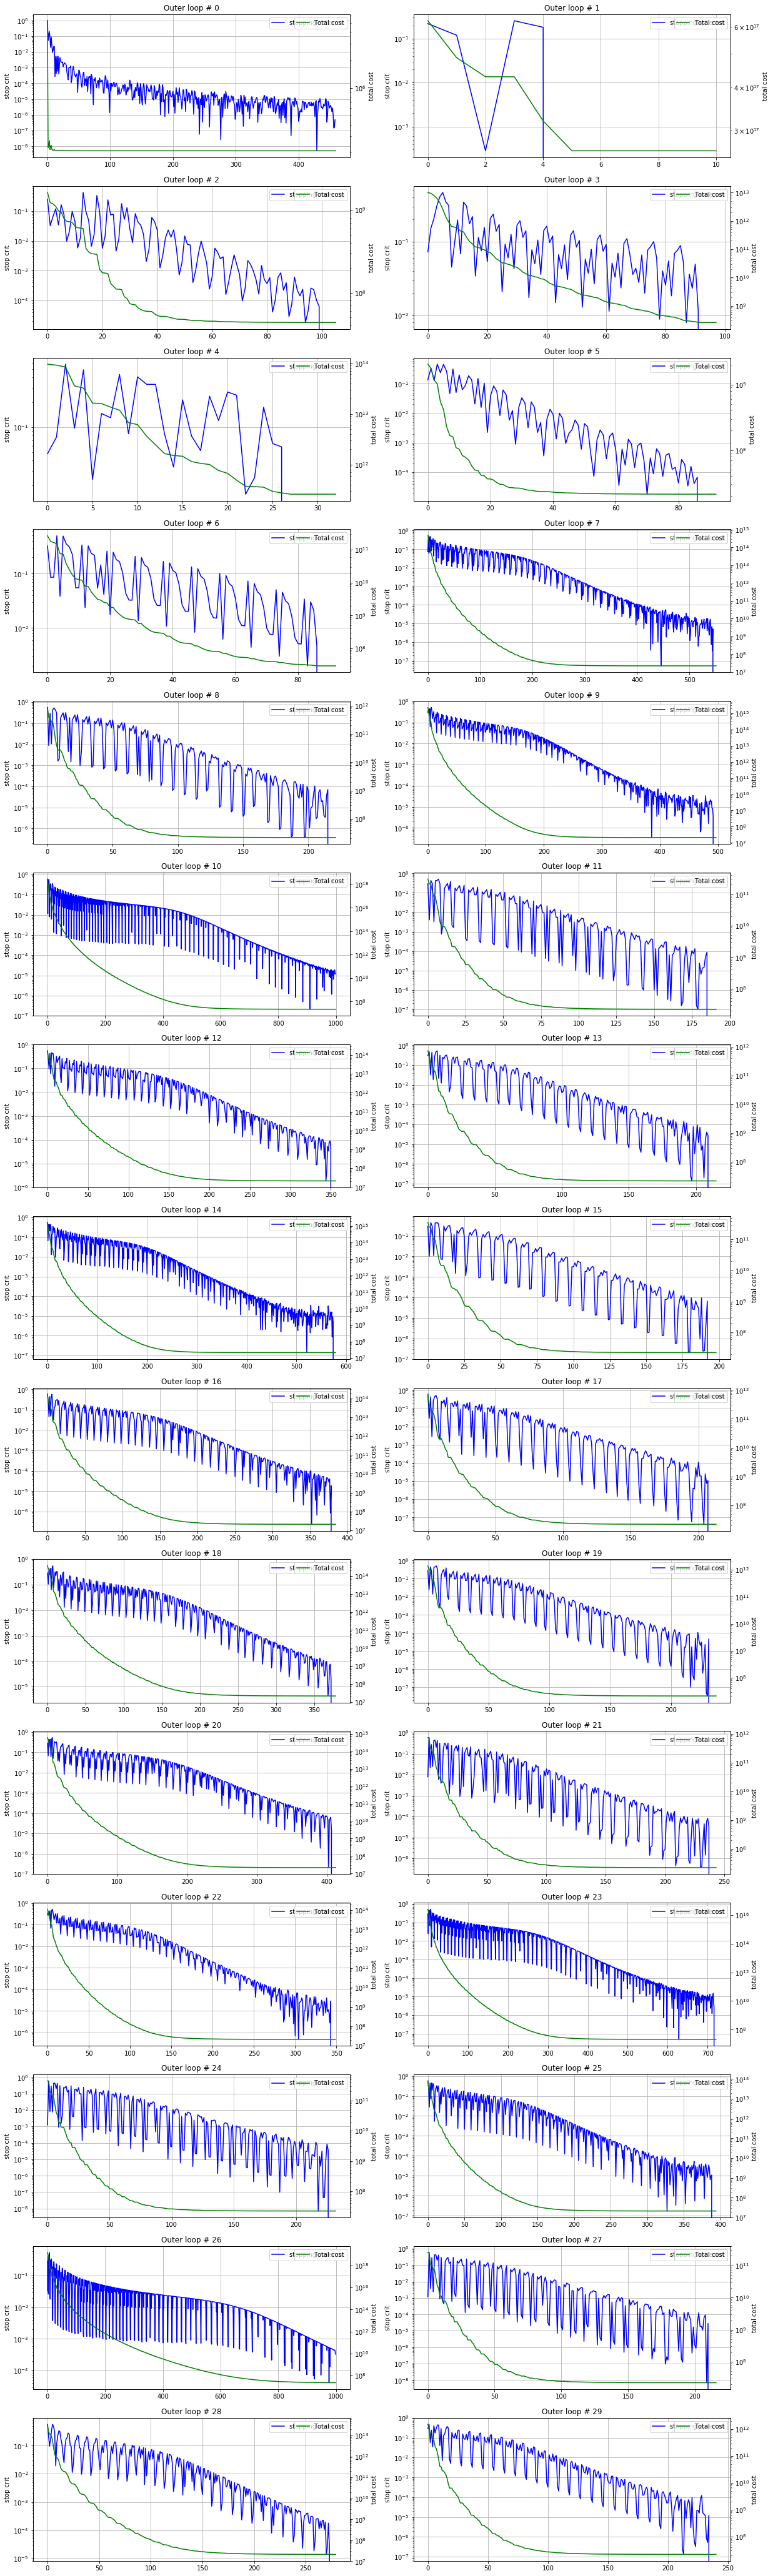

In [146]:
plot_stop_and_cost(opt_res)

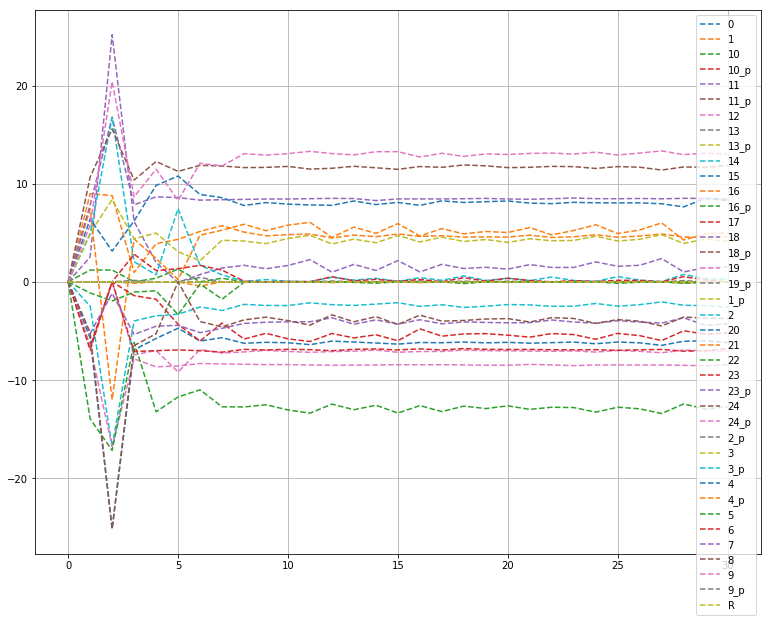

In [147]:
plot_ri_list(ri_FW)

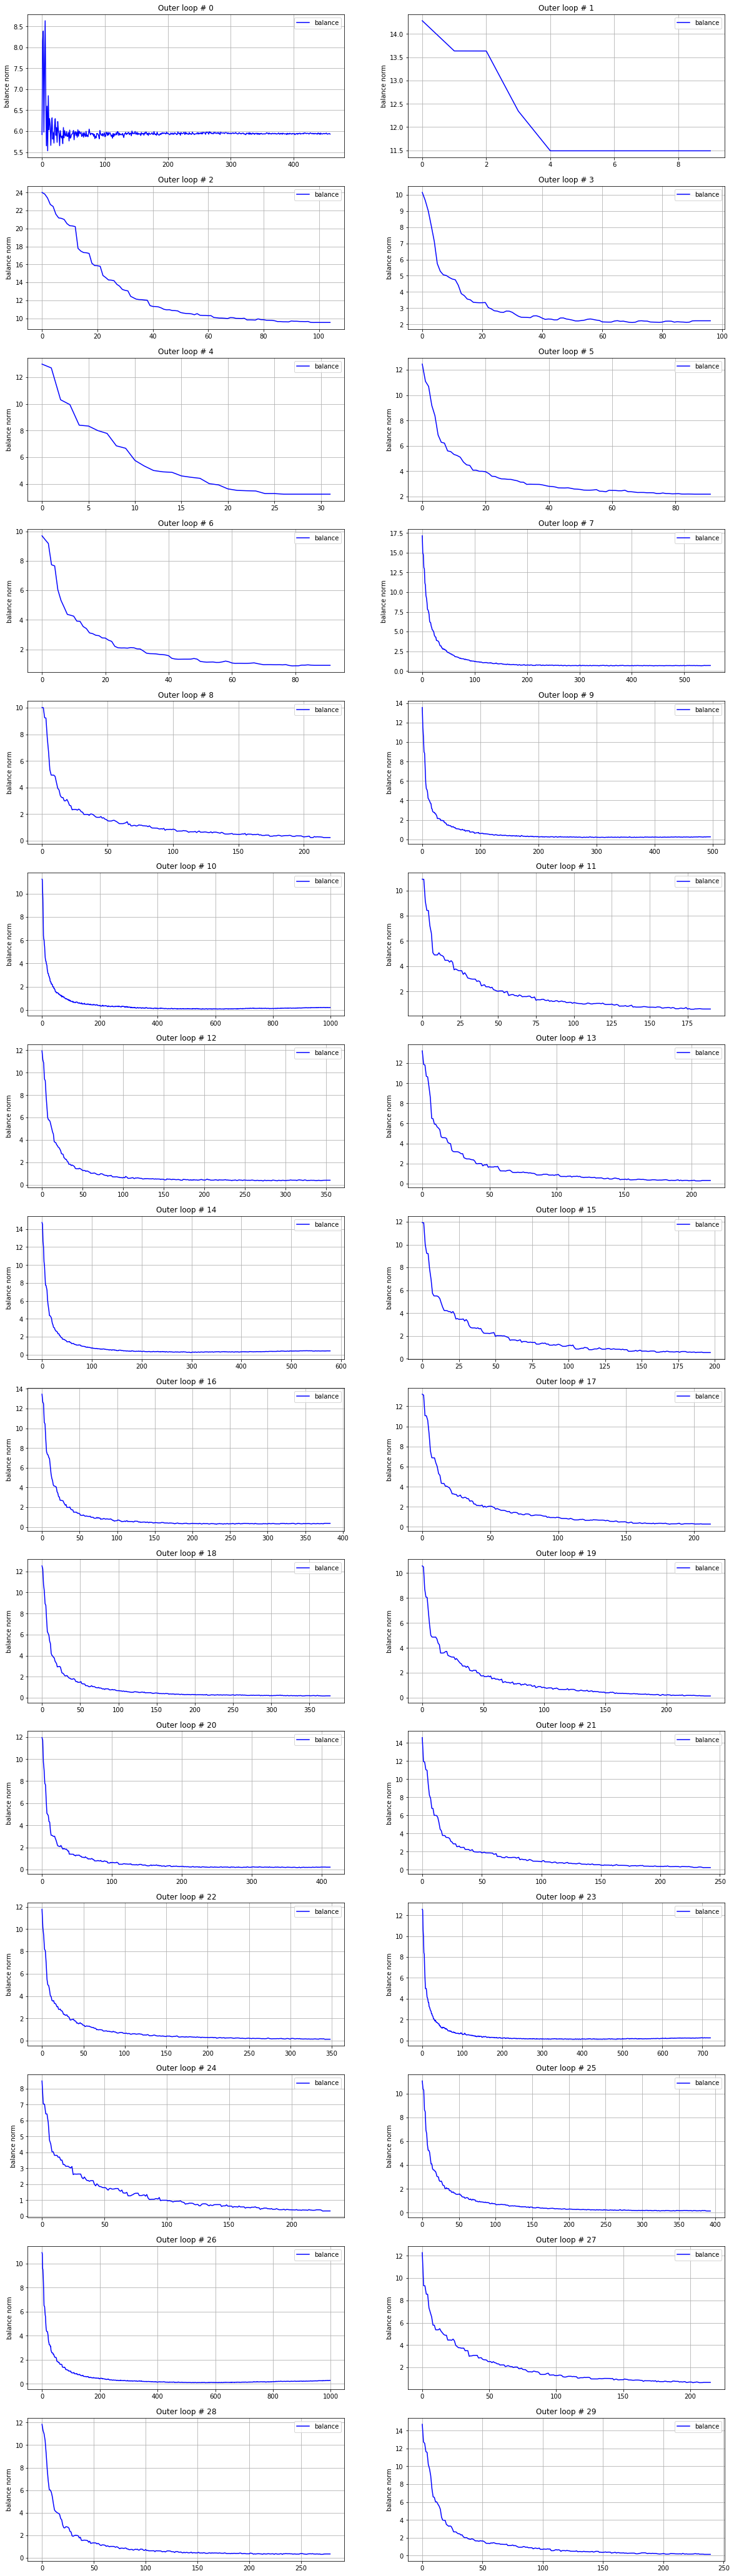

In [148]:
plot_balance_list(balance_list)

# 100 Nodes

In [189]:
n_nodes=100
subfolder='results'

In [190]:
path='Data/'+str(n_nodes)+'Nodes/outputs/quals/'+subfolder

In [195]:
print(os.listdir(path))

['output_L_10000_ni_1000_no_30_ev_0_relative_progress_fu_False.pkl', 'output_L_10000_ni_5000_no_40_ev_0_relative_progress_fu_True.pkl', 'output_L_10000_ni_1000_no_30_ev_0_relative_progress_fu_True.pkl']


In [197]:
filename=os.listdir(path)[2]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list = pickle.load(f)

output_L_10000_ni_1000_no_30_ev_0_relative_progress_fu_True.pkl


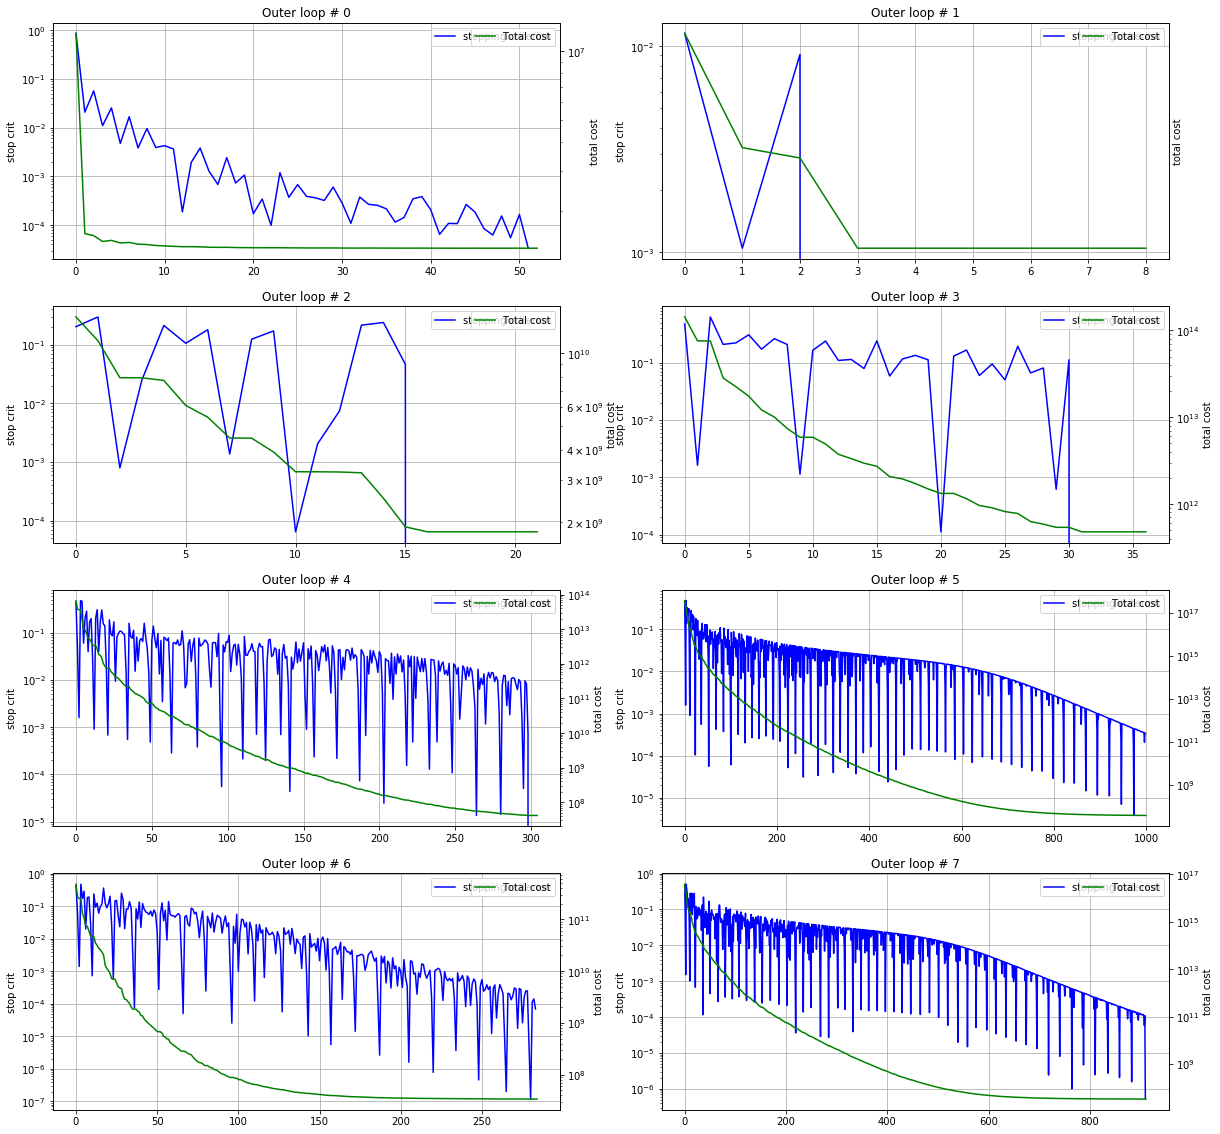

In [198]:
plot_stop_and_cost(opt_res)

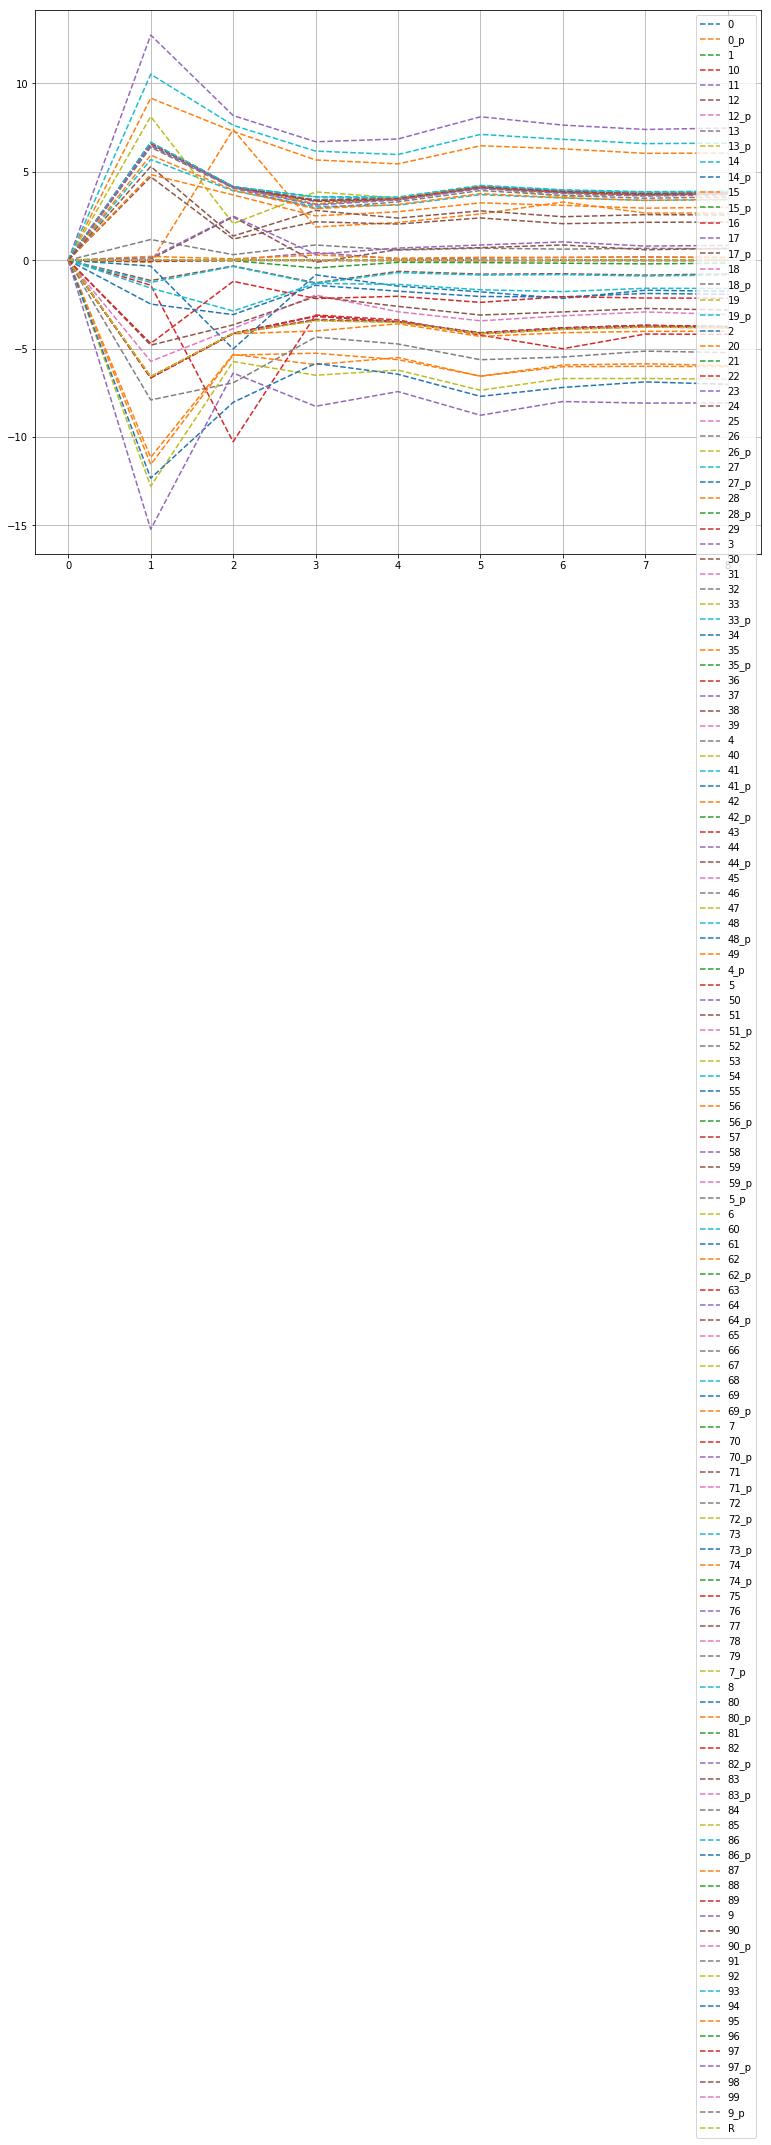

In [199]:
plot_ri_list(ri_FW)

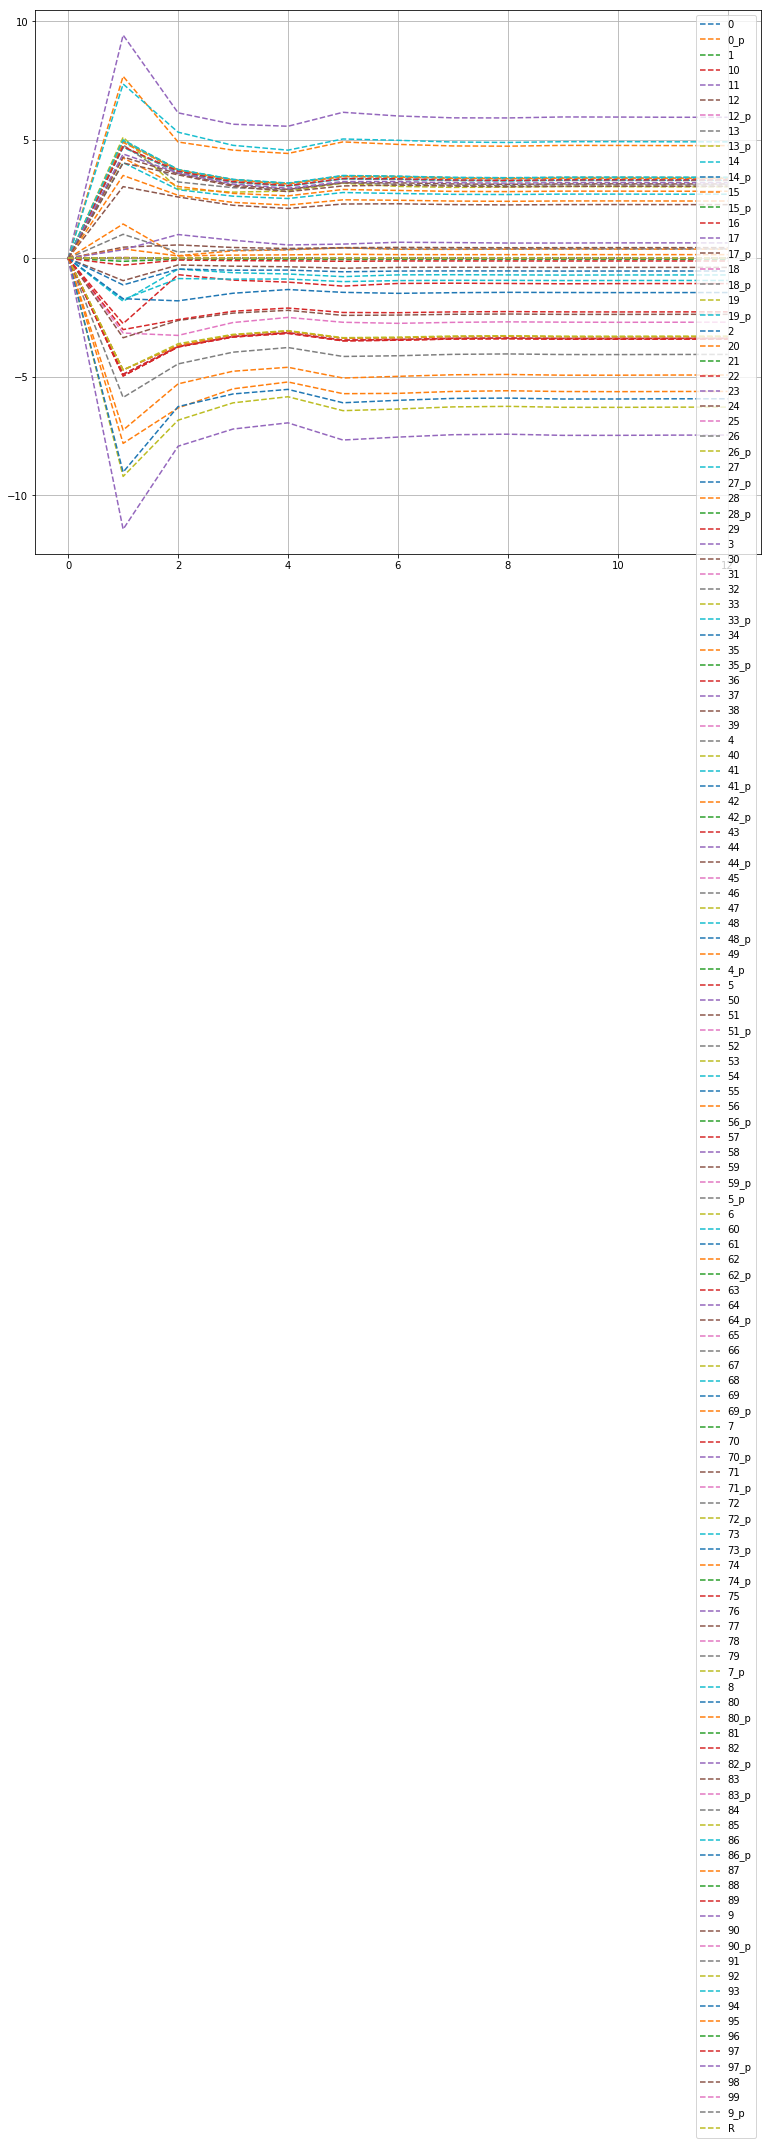

In [180]:
plot_ri_list(ri_FW)

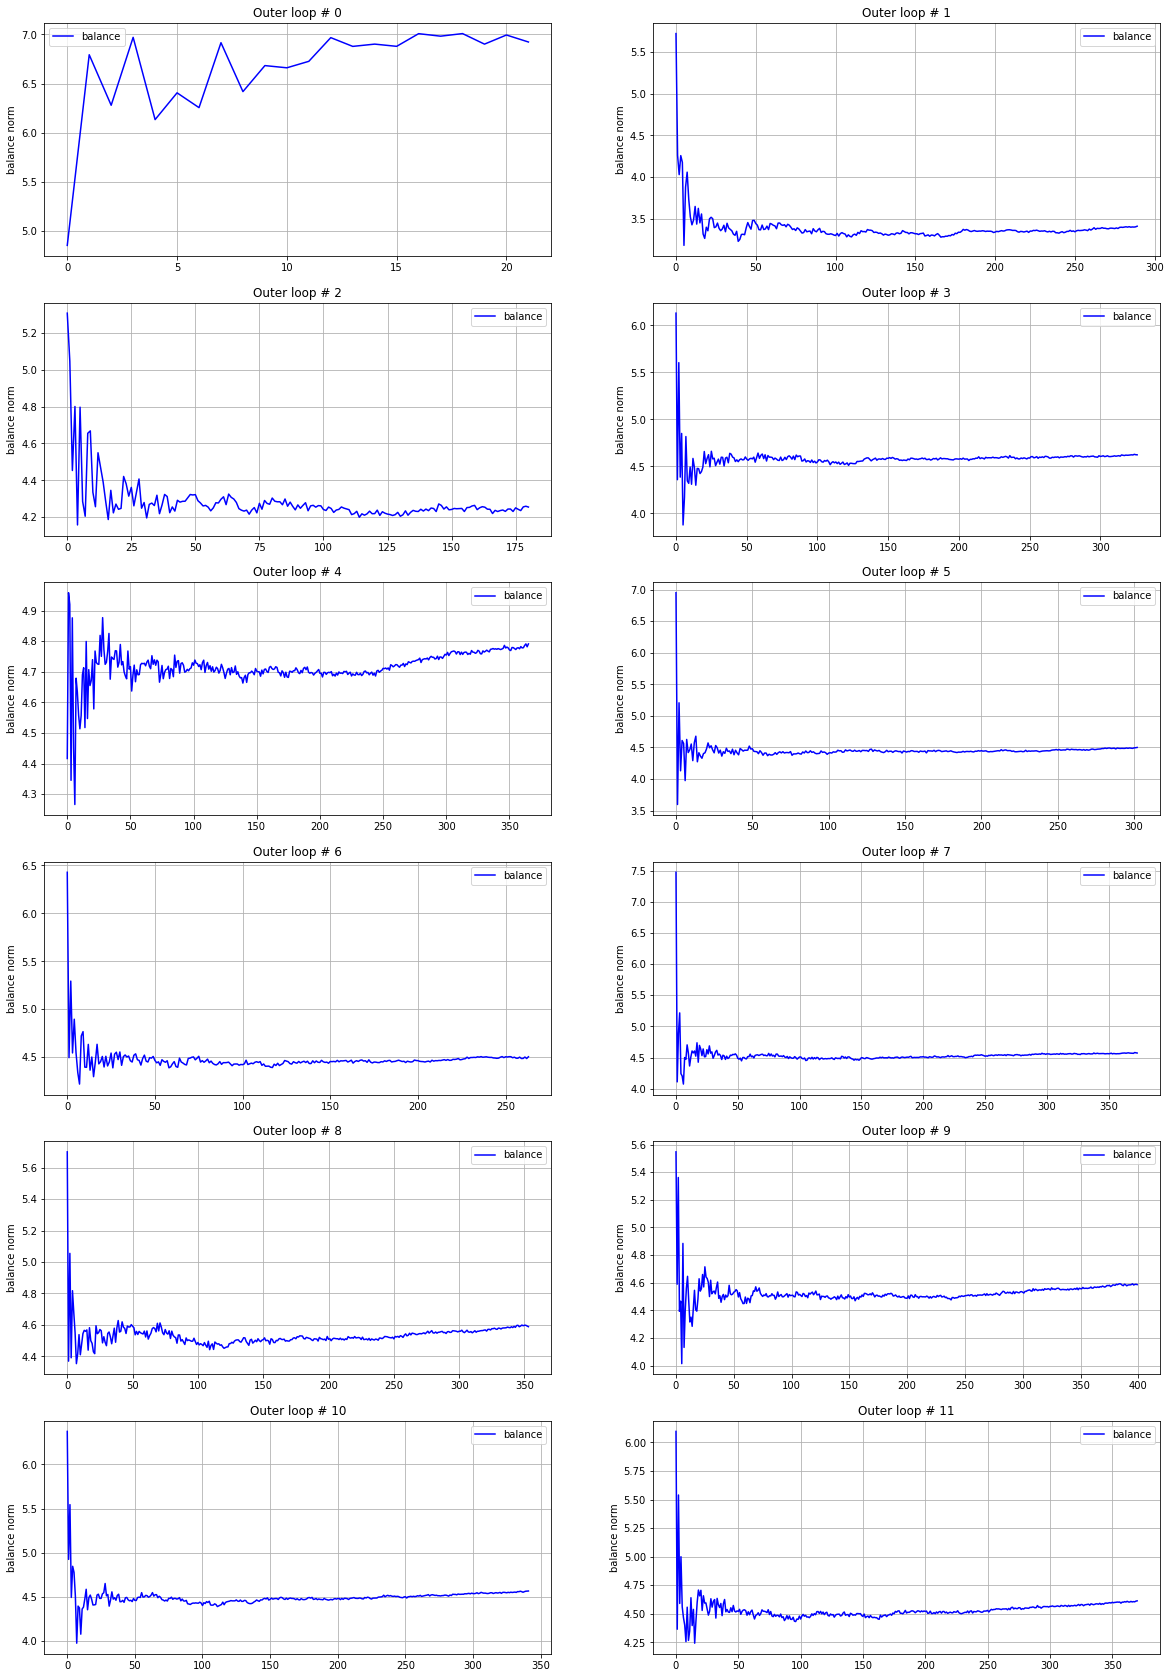

In [181]:
plot_balance_list(balance_list)

For 100 nodes, if you keep the tol sufficiently low then of course it will most likely go to 1000 iterations. But even with bumps the ri are very smooth. 

However, if you raise the tol, some iterations are cut short and the ri start oscillating. 

I really do not know whether the udpate factor is a good idea or not... It seems to me that it is but on the other hand it does not work.

why allow for larger FW_tol? simply because you will not reach a low FW tol if you allow the bumps. So you have to choose. 

# 200 Nodes

In [79]:
n_nodes=200
subfolder='results'

In [80]:
path='Data/'+str(n_nodes)+'Nodes/outputs/quals/'+subfolder

In [81]:
print(os.listdir(path))

['output_L_10000_ni_5000_no_40_ev_0_relative_progress_fu_True.pkl']


In [82]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list = pickle.load(f)

output_L_10000_ni_5000_no_40_ev_0_relative_progress_fu_True.pkl


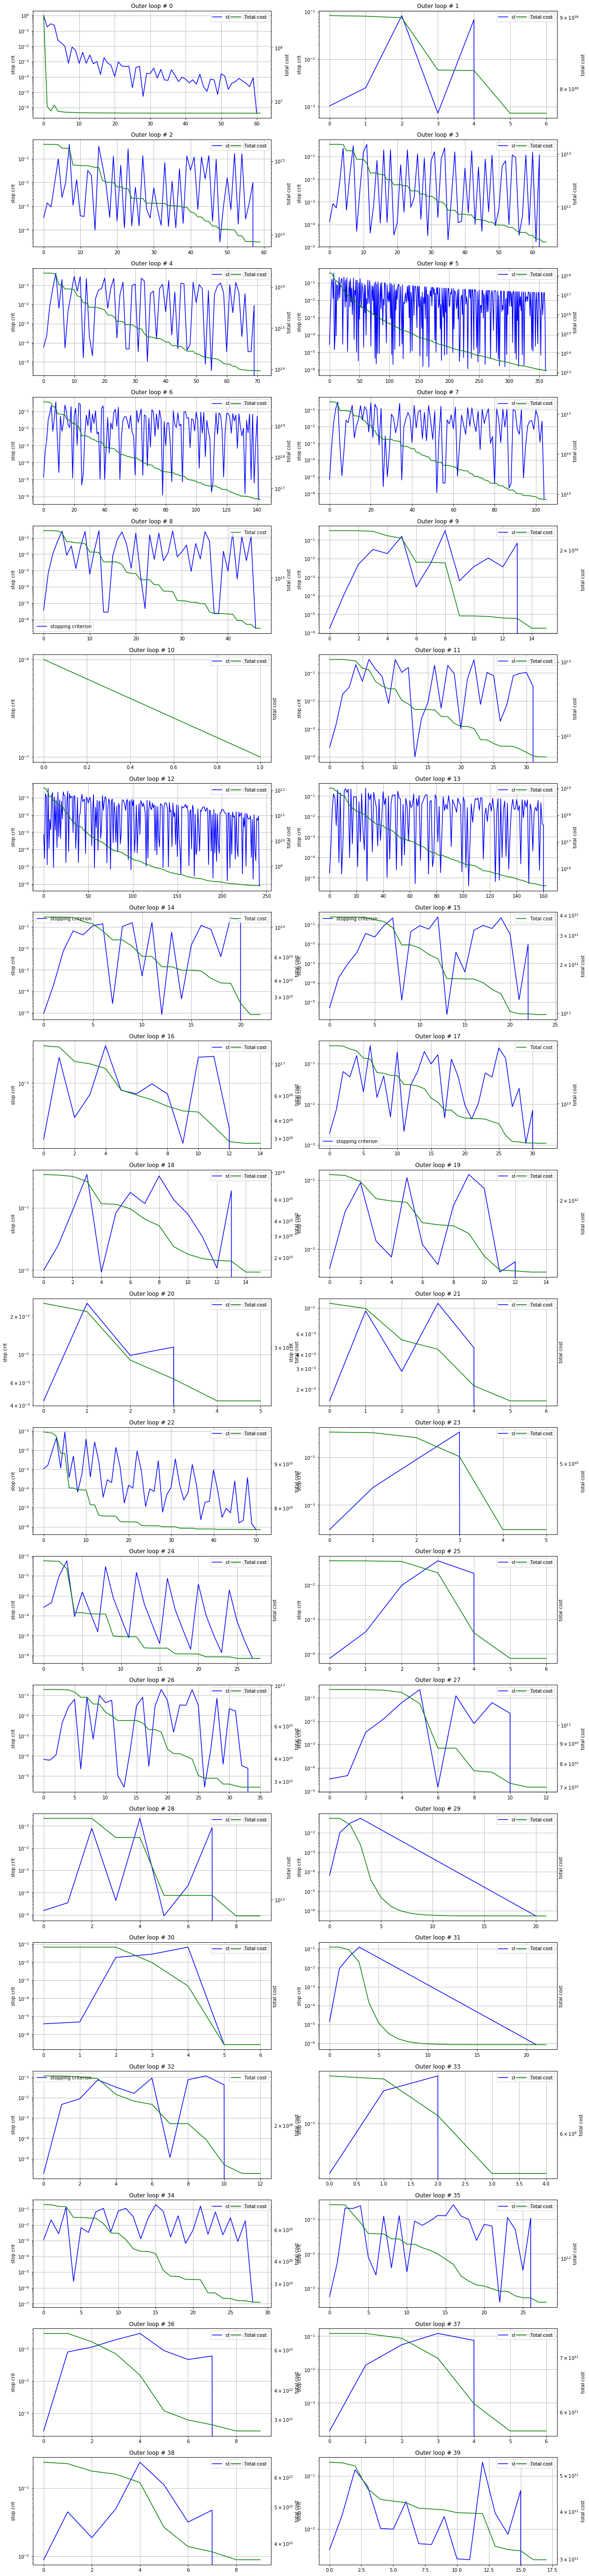

In [83]:
plot_stop_and_cost(opt_res)

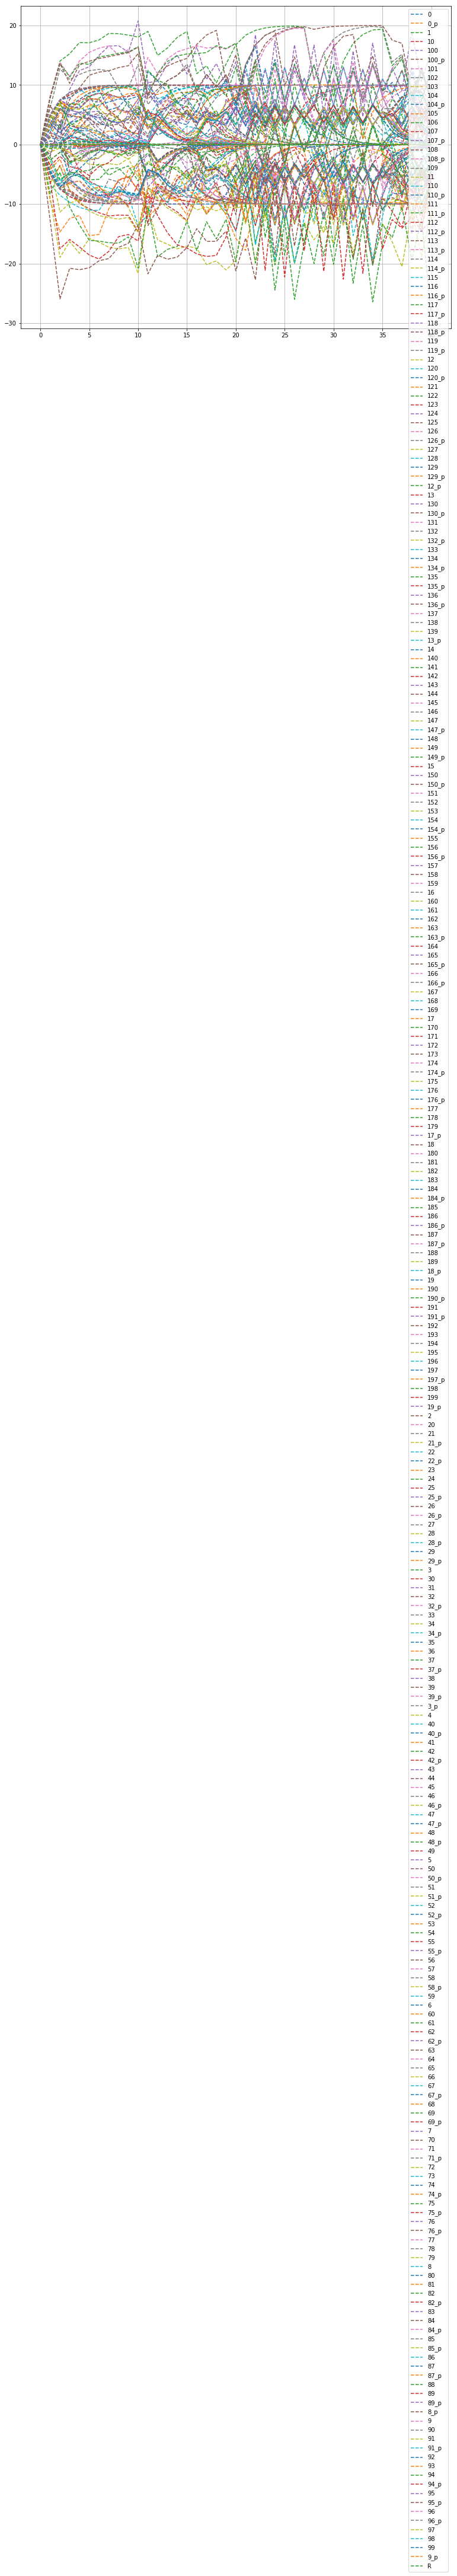

In [84]:
plot_ri_list(ri_FW)

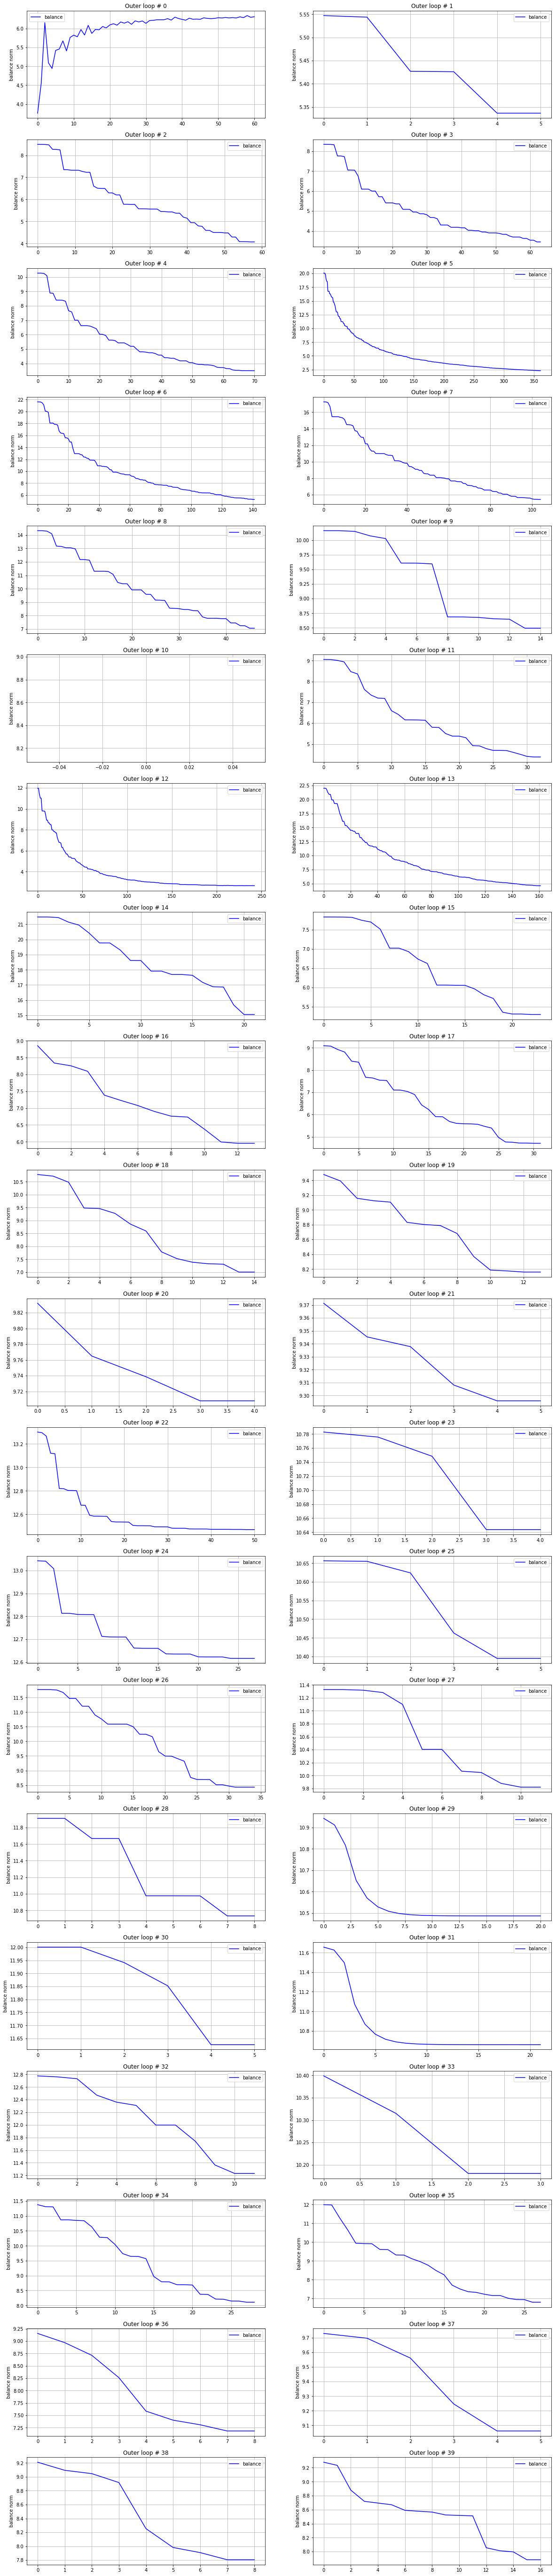

In [85]:
plot_balance_list(balance_list)